<a href="https://colab.research.google.com/github/Issld/my-projects/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Подготовка проекта

Импорт библиотек, необходимых для работы.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.feature_selection
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
from tensorflow import keras
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler

Импорт выборки из .csv файла

In [54]:
CSV_FILE = '/content/V4.csv'
SEED = 42
TEST_SIZE = 0.2
VAL_SIZE = 0.25

Чтение и парсинг данных из .csv файла

In [55]:
data = pd.read_csv(CSV_FILE)
data = data.rename(columns={data.columns[0]: '#'})

##Разведочный анализ

###Построение описательной статистики

Отображение первых 5-ти записей из файла

In [56]:
data.head()

,#,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0.0,42,62812.093,11609.381,238961.250,35321.459
1,1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0.0,41,66646.893,9572.957,530973.908,45115.526
2,2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,NaN,43,53798.551,11160.355,638467.177,42925.709
3,3,Jade Cunningham,malesuada@dignissim.com,USA,NaN,58,79370.038,14426.165,548599.052,67422.363
4,4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1.0,57,59729.151,5358.712,560304.067,55915.462


Определение размерности выборки

In [57]:
data.shape

(500, 10)

Определение типов данных атрибутов

In [58]:
data.dtypes

,0
#,int64
Customer Name,object
Customer e-mail,object
Country,object
Gender,float64
Age,int64
Annual Salary,float64
Credit Card Debt,float64
Net Worth,float64
Car Purchase Amount,float64


Получение краткого описания всех атрибутов

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    500 non-null    int64  
 1   Customer Name        500 non-null    object 
 2   Customer e-mail      500 non-null    object 
 3   Country              500 non-null    object 
 4   Gender               244 non-null    float64
 5   Age                  500 non-null    int64  
 6   Annual Salary        500 non-null    float64
 7   Credit Card Debt     500 non-null    float64
 8   Net Worth            500 non-null    float64
 9   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 39.2+ KB


Получение более подробных сведений по проблемному атрибуту Gender (пропуски данных)

In [60]:
data["Gender"].value_counts()

,count
Gender,
0.0,122
1.0,122


Удаление несущественных параметров. Параметр # хранит номер записи. Параметры Customer Name и Customer e-mail хранят личную информацию о человеке, не интересующую нас в рамках текущей задачи.  Параметр Country одинаков для всех записей (имеет значение "USA"), значит он так же не интересует нас в рамках текущей задачи.

In [61]:
data = data.drop(["#", "Customer Name", "Country", "Customer e-mail"], axis=1)

Сбор статистики по всем чистовым атрибутам

In [62]:
set_option('display.precision', 3)
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,244.000,500.000,500.000,500.000,500.000,500.000
mean,0.500,46.224,62127.240,9607.645,431475.714,44209.799
std,0.501,7.990,11703.378,3489.188,173536.756,10773.179
min,0.000,20.000,20000.000,100.000,20000.000,9000.000
25%,0.000,41.000,54391.977,7397.516,299824.196,37629.896
50%,0.500,46.000,62915.497,9655.036,426750.121,43997.783
75%,1.000,52.000,70117.862,11798.867,557324.479,51254.710
max,1.000,70.000,100000.000,20000.000,1000000.000,80000.000


###Визуализация данных

Построение гистограмм для всех параметров

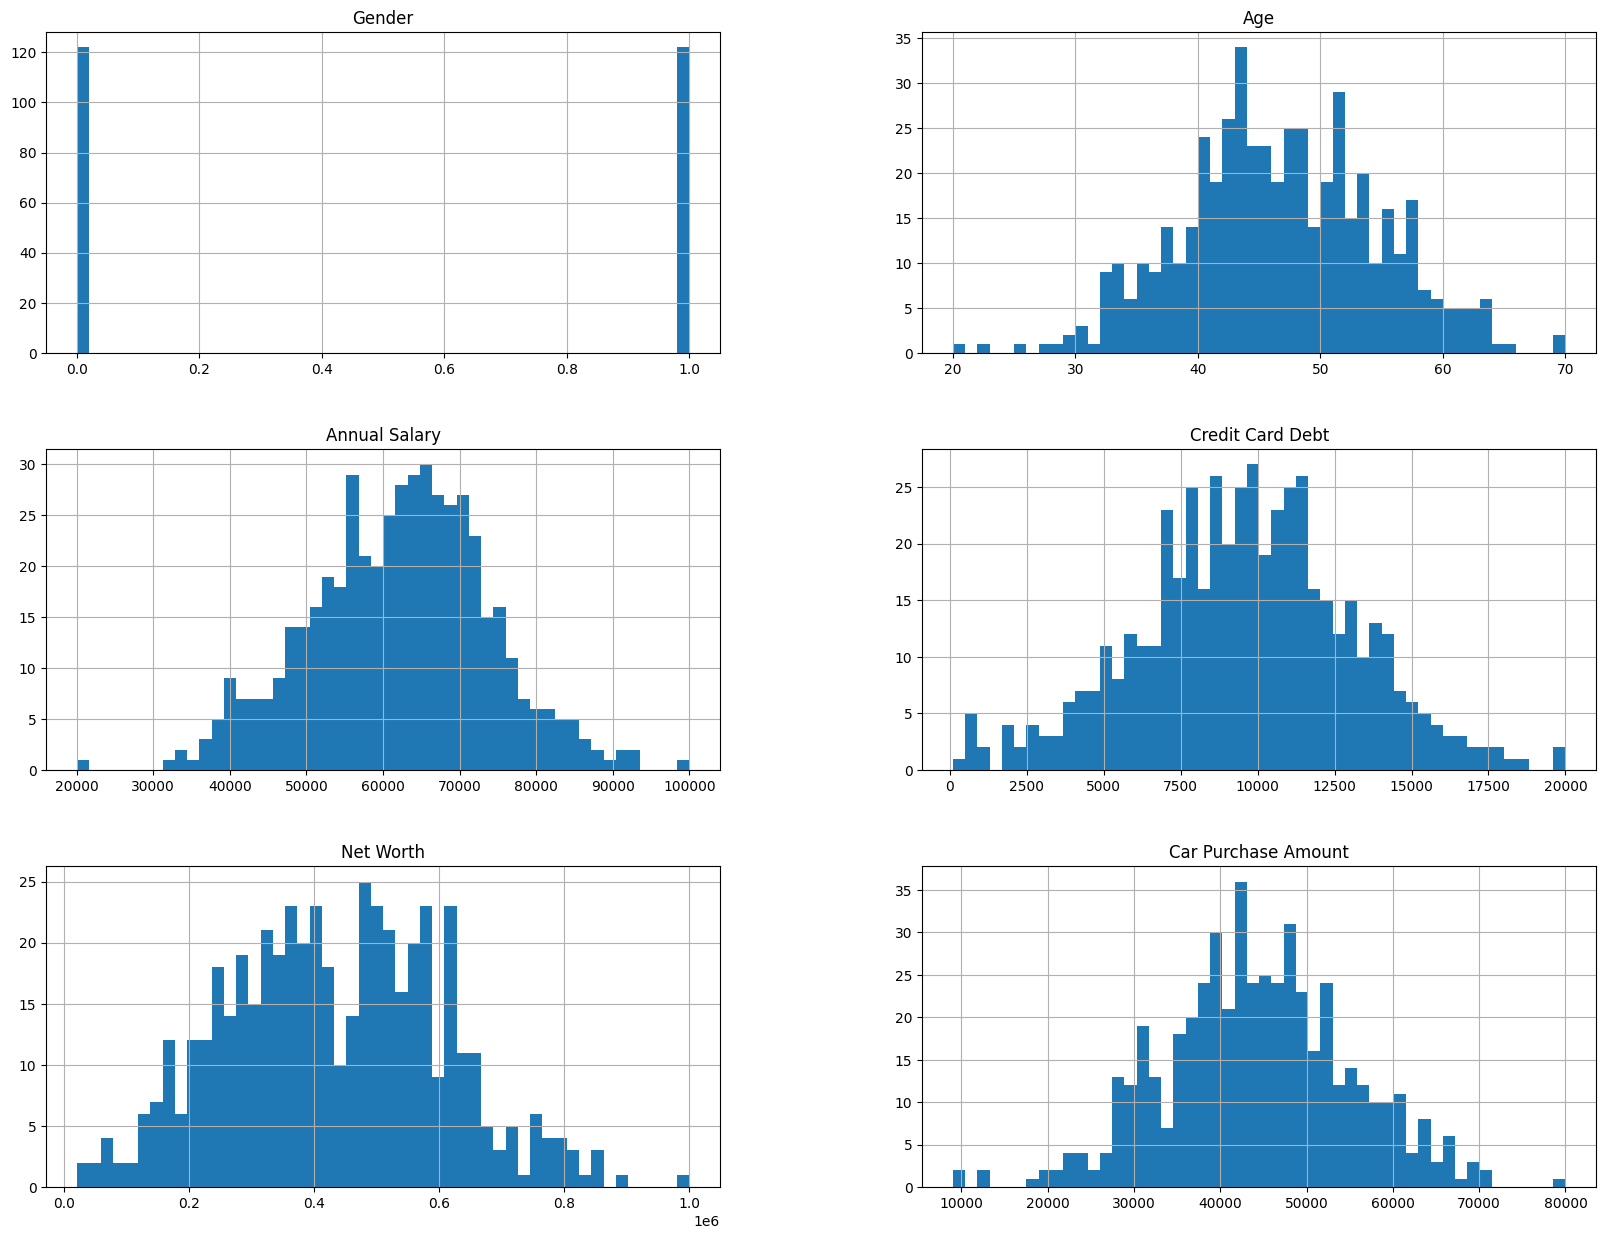

In [63]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Построение графиков плотности

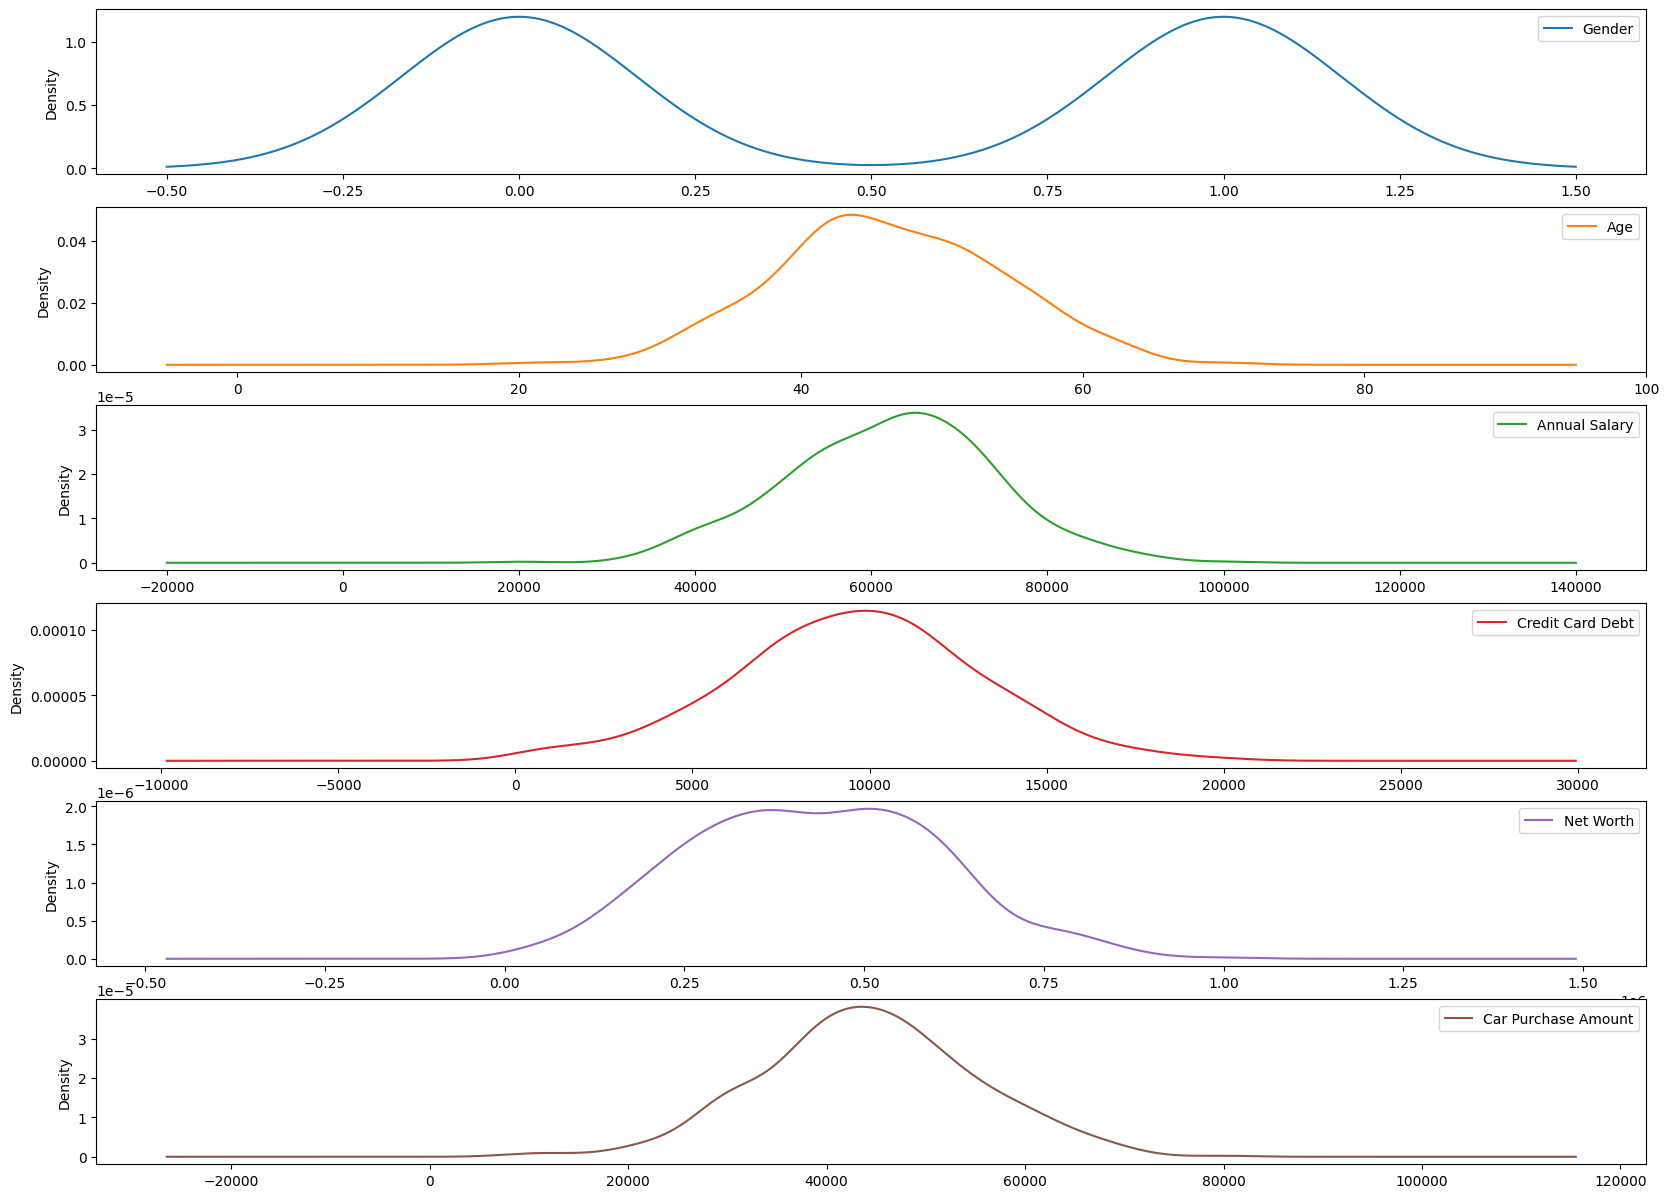

In [64]:
data.plot(kind="density", subplots=True, sharex=False, figsize=(20,15))
plt.show()

Построение корреляционной матрицы

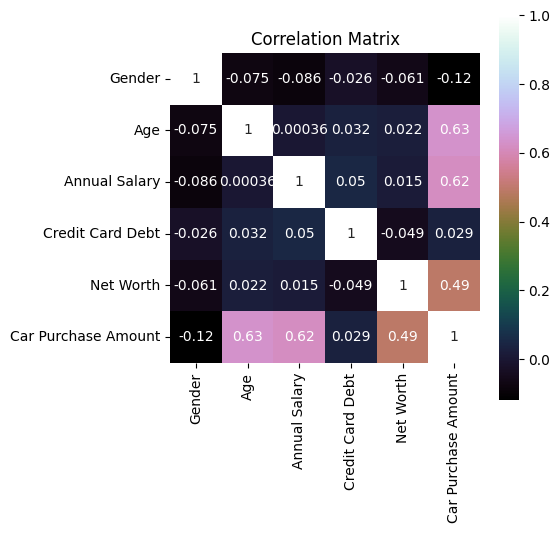

In [65]:
plt.figure(figsize=(5, 5))
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), square=True, annot=True, cmap="cubehelix")
plt.show()

Построение матрицы диаграмм рассеяния

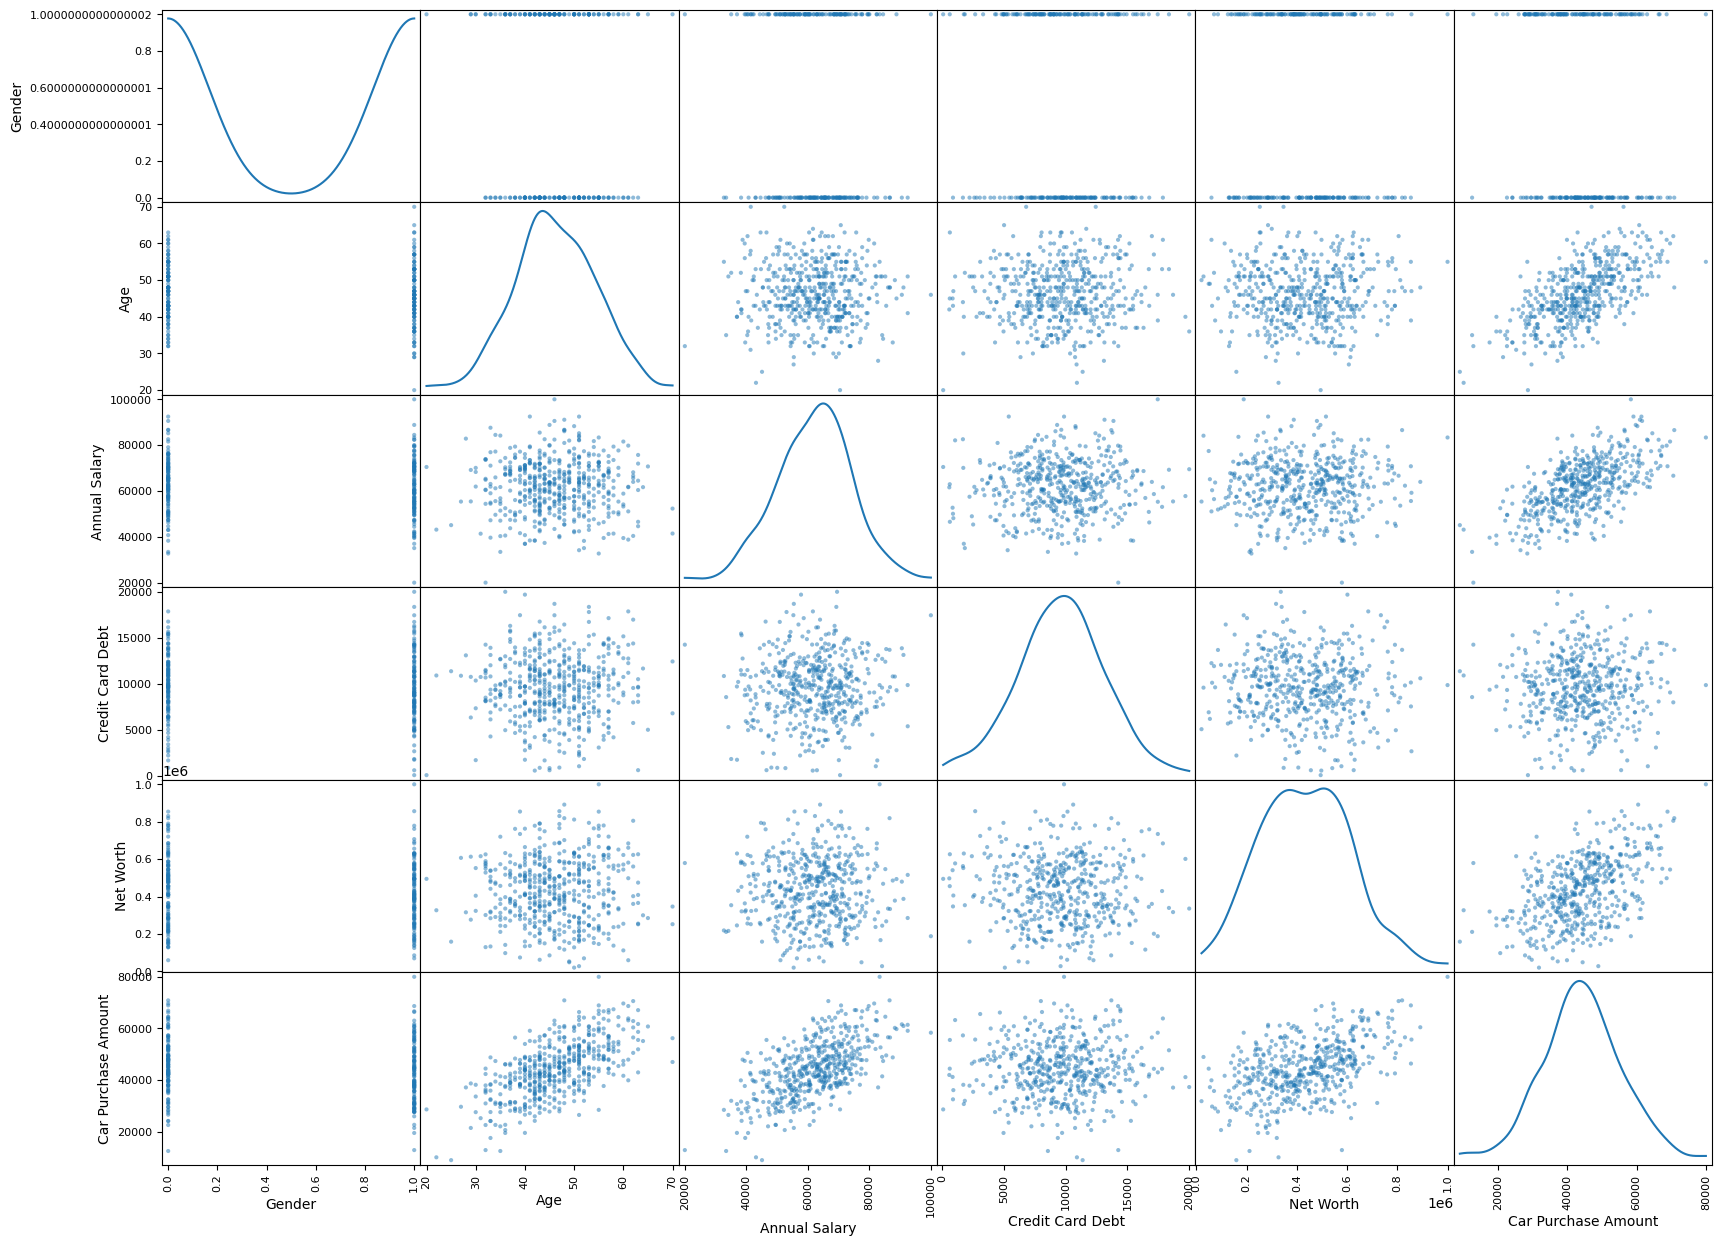

In [66]:
pd.plotting.scatter_matrix(data, figsize=(20,15), diagonal="density")
plt.show()

##Поиск корреляционной зависимости

Вычисление стандартного коэффициента корреляции

In [67]:
corr_matrix = data.corr()
corr_matrix

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000,-7.543e-02,-8.627e-02,-0.026,-0.061,-0.120
Age,-0.075,1.000e+00,3.607e-04,0.032,0.022,0.633
Annual Salary,-0.086,3.607e-04,1.000e+00,0.050,0.015,0.618
Credit Card Debt,-0.026,3.175e-02,4.960e-02,1.000,-0.049,0.029
Net Worth,-0.061,2.179e-02,1.477e-02,-0.049,1.000,0.489
Car Purchase Amount,-0.120,6.333e-01,6.179e-01,0.029,0.489,1.000


Просмотр данных по конкретному атрибуту

In [68]:
corr_matrix["Car Purchase Amount"].sort_values(ascending=False)

,Car Purchase Amount
Car Purchase Amount,1.000
Age,0.633
Annual Salary,0.618
Net Worth,0.489
Credit Card Debt,0.029
Gender,-0.120


Построение матриц диаграмм рассеивания

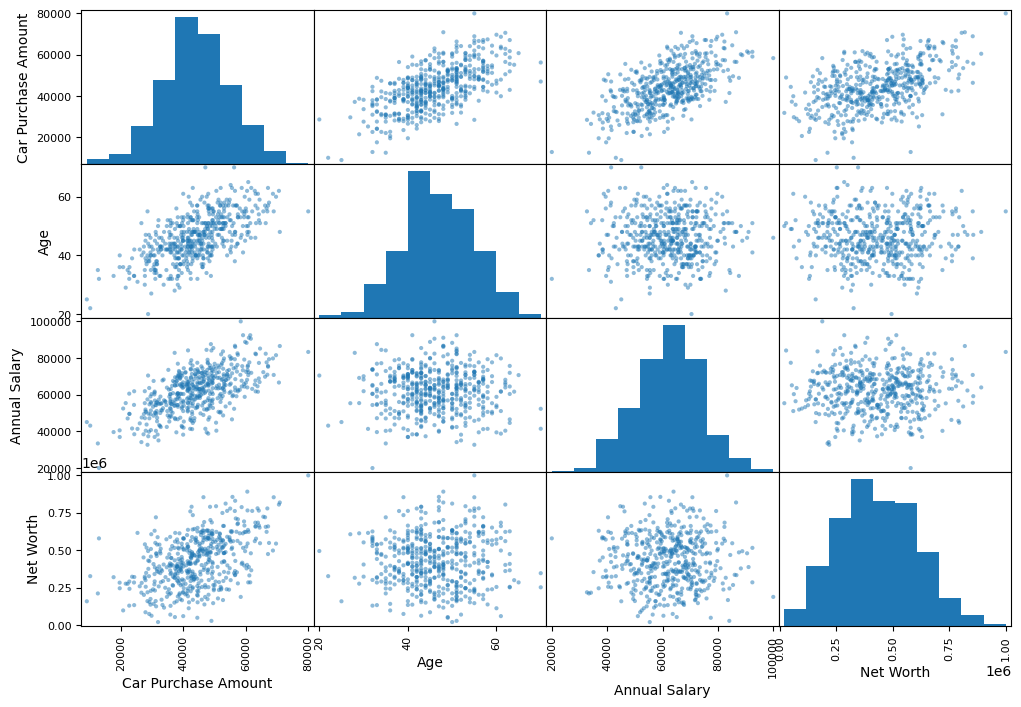

In [69]:
attributes = ["Car Purchase Amount", "Age", "Annual Salary", "Net Worth"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

##Подготовка данных

###Отчистка данных

Заполнение пропусков в атрибуте Gender. Т.к. атрибут бинарный, в половину записей будет добавлено значение 1, в половину значение 0.

In [70]:
nan_indices = data[data["Gender"].isna()].index
num_nans = len(nan_indices)
half_nans = num_nans // 2
fill_values = np.array([1] * half_nans + [0] * (num_nans - half_nans))
np.random.shuffle(fill_values)
data.loc[nan_indices, "Gender"] = fill_values

###Отбор информативных признаков

Оценка признаков

In [71]:
data_x = data.iloc[:,:5]
data_y = data["Car Purchase Amount"]

best_features = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.f_regression, k="all")
fit = best_features.fit(data_x, data_y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(data_x.columns)
feature_scores = pd.concat([columns, scores], axis = 1)

feature_scores

,0,0
0,Gender,1.854
1,Age,333.433
2,Annual Salary,307.503
3,Credit Card Debt,0.416
4,Net Worth,156.153


Удаление неинформативных признаков

In [72]:
data = data.drop(["Gender", "Credit Card Debt"], axis=1)

###Преобразование данных

Min-max масштабирование данных

In [75]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_dig = data.iloc[:,:3]
data_dig

,Age,Annual Salary,Net Worth
0,42,62812.093,238961.250
1,41,66646.893,530973.908
2,43,53798.551,638467.177
3,58,79370.038,548599.052
4,57,59729.151,560304.067
...,...,...,...
495,41,71942.403,541670.102
496,38,56039.498,360419.099
497,54,68888.778,764531.320
498,59,49811.991,337826.638
